### 用numpy创建基础函数

#### sigmoid 函数的创建

先尝试使用python自带的math类库来实现，coding如下


In [16]:
import math

def basic_sigmoid(x):
    """
    python自带的math类库来实现
    """
    s = 1.0/(1+math.exp(-x))
    return s

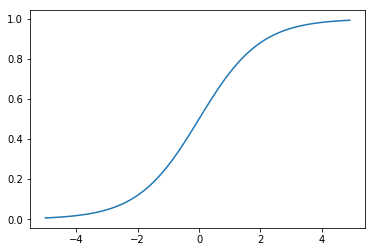

In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

y = np.arange(-5.0,5,0.1)
x = np.arange(-5.0,5,0.1)
j=0
for i in np.arange(-5.0,5,0.1):
    y[j] = basic_sigmoid(i)
    j+=1

plt.plot(x,y)
# 显示该图像
plt.show()


上面的只能计算关于单个数据，如果是输入的x是一个向量或者是一个矩阵，这个函数就不能用了。如下coding

In [25]:
x = [1,2,3]
y = basic_sigmoid(x)

TypeError: bad operand type for unary -: 'list'

这个时候numpy这个的类库的作用就可以体现了，因为npmpy中的exp函数可以接收的数据类型种类很多种：
- 数值
- 向量,列表
- 矩阵...
其原理如下
x=(x1,x2,...,xn)
np.exp(x)=(ex1,ex2,...,exn)
具体coding如下：

In [30]:
import numpy as np
# 列表
x = [1,2,3]
y = np.exp(x)
print(y)

# 向量
x =np.array([1,2,3])
y = np.exp(x)
print(y)

# 矩阵
x =np.array([[0,2,3],[2,3,4]])
y = np.exp(x)
print(y)

# 向量的加法
print(x+3)

[ 2.71828183  7.3890561  20.08553692]
[ 2.71828183  7.3890561  20.08553692]
[[ 1.          7.3890561  20.08553692]
 [ 7.3890561  20.08553692 54.59815003]]
[[3 5 6]
 [5 6 7]]


In [31]:
# sigmoid 函数

import numpy as np

def sigmoid(x):
    """
    numpy 实现sigmoid函数
    """
    return 1.0/(1.0+np.exp(-x))


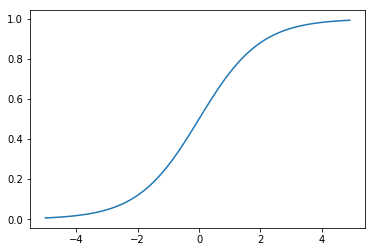

In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y)


### Sigmoid 的梯度函数

sigmoid函数的导数，大家可以自己推导一下，有一定的技巧在里面。最终的结果如下：  

sigmoid_derivative(x)=σ′(x)=σ(x)(1−σ(x))  
σ′(x)=s(1−s)


In [36]:
def sigmoid_derivative(x):
    """
    sigmoid函数的导数
    """
    s = 1.0/(1.0+np.exp(-x))
    ds = s * (1-s)
    return ds


In [39]:
x = np.array([1.0,2,3])
print("sigmoid(x) 的导数为:"+str(sigmoid_derivative(x)))

sigmoid(x) 的导数为:[0.19661193 0.10499359 0.04517666]


#### 向量的Reshaping

- X.shape:数组的形状,数组的维度
- X.reshape():表示对数据转换成其它的维度形状

比如我们的图像数据格式[length,height,depth], 数据的shape为(3,1)，维度为3
如果我们想让数据3D变换成成一列1D,这个时候就需要使用`reshape`


In [41]:
def image2vecotr(image):
    """
    将一个图片数据变换成一个向量列表
    """
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2],1))
    
    return v

In [44]:
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print(image.shape)

print("image2vecotr(image)转换成一个vector:"+str(image2vecotr(image)))
print(image2vecotr(image).shape)

(3, 3, 2)
image2vecotr(image)转换成一个vector:[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]
(18, 1)


####  行的归一化

归一化是一个很好的让梯度下降更快的方法，这里我们介绍一个简单的归一化方法，行的归一化。具体实现如下：

![](imgs/1.jpg)

我们需要使用的numpy函数是：
**np.linalg.norm**

>ord=1：列和的最大值
ord=2：|λE-ATA|=0，求特征值，然后求最大特征值得算术平方根(matlab在线版，计算ans=ATA，[x,y]=eig(ans)，sqrt(y)，x是特征向量，y是特征值)
ord=∞：行和的最大值
ord=None：默认情况下，是求整体的矩阵元素平方和，再开根号。（没仔细看，以为默认情况下就是矩阵的二范数，修正一下，默认情况下是求整个矩阵元素平方和再开根号）
③axis：处理类型
axis=1表示按行向量处理，求多个行向量的范数
axis=0表示按列向量处理，求多个列向量的范数
axis=None表示矩阵范数。
④keepding：是否保持矩阵的二维特性
True表示保持矩阵的二维特性，False相反



In [49]:
#np.linalg.norm的使用

x = np.array([
    [0, 3, 4],
    [1, 6, 4]])


print("默认参数(矩阵整体元素平方和开根号，不保留矩阵二维特性)：",np.linalg.norm(x))
print("矩阵整体元素平方和开根号，保留矩阵二维特性：",np.linalg.norm(x,keepdims=True))
 
print("矩阵每个行向量求向量的2范数：",np.linalg.norm(x,axis=1,keepdims=True))
print("矩阵每个列向量求向量的2范数：",np.linalg.norm(x,axis=0,keepdims=True))
 
print("矩阵1范数：",np.linalg.norm(x,ord=1,keepdims=True))
print("矩阵2范数：",np.linalg.norm(x,ord=2,keepdims=True))
print("矩阵∞范数：",np.linalg.norm(x,ord=np.inf,keepdims=True))
 
print("矩阵每个行向量求向量的1范数：",np.linalg.norm(x,ord=1,axis=1,keepdims=True))

print("矩阵每个行向量求求和：",np.sum(x,axis=1,keepdims=True))


默认参数(矩阵整体元素平方和开根号，不保留矩阵二维特性)： 8.831760866327848
矩阵整体元素平方和开根号，保留矩阵二维特性： [[8.83176087]]
矩阵每个行向量求向量的2范数： [[5.        ]
 [7.28010989]]
矩阵每个列向量求向量的2范数： [[1.         6.70820393 5.65685425]]
矩阵1范数： [[9.]]
矩阵2范数： [[8.70457079]]
矩阵∞范数： [[11.]]
矩阵每个行向量求向量的1范数： [[ 7.]
 [11.]]
矩阵每个行向量求求和： [[ 7]
 [11]]


In [47]:
def normalizeRows(x):
    
    """
    行的归一化
    """
    
    x_norm = np.linalg.norm(x,axis=1,keepdims=True)
    
    x = x/x_norm
    return x


In [48]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) =", normalizeRows(x))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


#### Softmax 函数

上面我们利用了numpy的一个重要的功能实现了x+3,np.exp(-x),那就是广播，这个是一个非常重要的属性。
这里我们总结几条可以广播的规则：
- 数组维度不同，后缘维度的轴长相符
- 数组维度相同，其中有个轴为1

更多内容可以参考[广播](https://www.numpy.org.cn/user/basics/broadcasting.html#%E4%B8%80%E8%88%AC%E5%B9%BF%E6%92%AD%E8%A7%84%E5%88%99)

这里我们再举一个例子关于广播，比如我们要实现softmax函数的。

softmax函数的实践过程如下图：
![](imgs/2.jpg)

In [50]:
def softmax(x):
    """
    x - 维度可以是(n,m)
    """
    
    x_exp = exp(x)
    # 利用sum函数来实现行向量的叠加
    x_sum = np.sum(x,axis=1,keepdims=True)
    # 利用广播来实现
    s = x_exp/x_sum
    
    return s

#### 总结

- np.exp(x) 可以对于任意shape的x进行实践
- 实践sigmoid和sigmoid的导数
- image2vector 利用reshap可以实现3D 到 1D
- np.reshape使用非常的广泛，但是要主要bug出现，主要是没有加上后面的（，1）.
- 广播在numpy中是一个非常重要的特性，要好好掌握


###  向量化

#### 向量化与矩阵的乘法

向量化是非常基础的去除代码中for循环的艺术，在深度学习安全领域、深度学习实践中，你会经常发现自己训练大数据集，因为深度学习算法处理大数据集效果很棒，所以你的代码运行速度非常重要，否则如果在大数据集上，你的代码可能花费很长时间去运行，你将要等待非常长的时间去得到结果。所以在深度学习领域，运行向量化是一个关键的技巧，让我们举个栗子说明什么是向量化。

Numpy中的矩阵的乘法是利用如下的函数：
- `np.dot(A,B)`
- 矩阵的乘积也称为点积

矩阵乘法的工作原理：
- 矩阵的乘积是通过左边矩阵的行（横向）和右边矩阵的列（纵向）以对应元素的方式相乘后再求和而得到的
- 运算的结果保存为新的多维数组的元素
    - 矩阵A的第1行与矩阵B的第1列乘积的结果，就放到新矩阵的第1行和第1列
    - 左边的矩阵决定结果的行号，右边的矩阵决定结果的列号

In [53]:
import numpy as np
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a,b)
toc = time.time()

print("向量化的计算速度",1000*(toc-tic),"ms")

tic = time.time()
for i in range(1000000):
    c += a[i] * b[i]
toc = time.time()
print("For 循环的计算速度",1000*(toc-tic),"ms")

向量化的计算速度 1.996755599975586 ms
For 循环的计算速度 424.56626892089844 ms


#### L1与L2的损失函数

L1的损失函数的如下：
![](imgs/3.jpg)


In [54]:
def L1(yhat,y):
    """
    yhat: 表示预测的结果，其为一个列表
    y: 表示真实的结果，其为一个列表
    """
    
    loss = np.sum(np.abs(y-yhat))
    
    return loss

L2的损失函数的如下：
![](imgs/3.jpg)

In [58]:
def L2(yhat,y):
    """
    yhat: 表示预测的结果，其为一个列表
    y: 表示真实的结果，其为一个列表
    """
    
    loss = np.sum(np.power((y-yhat),2))
    
    return loss

In [59]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))
print("L2 = " + str(L2(yhat,y)))

L1 = 1.1
L2 = 0.43
